In [40]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import glob
import math 
import seaborn as sns
colors=sns.color_palette('colorblind')
#import matplotlib as mpl
#mpl.style.use('paper.mplstyle')

#For exclusive channels, only need this function
def getContour(x,y,z,val,k, file=None):
    N=1500

    levels = [val]
    fig, ax = plt.subplots()

    xi = np.linspace(x.min(), x.max(), N)
    yi = np.linspace(y.min(), y.max(), N)
    zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

    cs = plt.contour(xi,yi,zi,levels)
    p = cs.collections[0].get_paths()
    plt.close(fig)  # Close the figure to avoid displaying it
    v = p[k].vertices
    
    return v

#For inclusive channels, need to profile over one of the parameters
# Vals is just taken from a text file where the corresponding columns mentioned in the function represent
#the chisq values, m4 values, ue4 values, and um4 values
#Returns profiled list of um4, m4, and chisq, in this case profiling over ue4
def make_list_over(vals):
    m4s  = np.unique(vals[:,3])   #m4
    ue4s = np.unique(vals[:,4])   #ue4
    um4s = np.unique(vals[:,5])   #um4

    # need to build list of um4 m4 chi2
    my_list = []
    for um4 in um4s:
        mask1 = vals[:,5]==um4
        for m4 in m4s:
            mask2 = vals[:,3]==m4
            mask = np.logical_and(mask1, mask2)
            #chisqs = vals[:,2][mask][0]
            chisqs = vals[:,2][mask][0]
            #chisq_min = chisqs[np.where(vals[:,4][mask]==np.min(vals[:,4][mask]))]
            chisq_min = np.min(vals[:,2][mask]) #[0]
            #print([um4, m4, chisq_min])
            my_list.append([um4, m4, chisq_min])
            #my_list.append([um4, m4, chisqs])
    return np.asarray(my_list)

/var/folders/zn/bxj5zskd2bbcy_741tt57c8c0000gn/T/ipykernel_79670/2272172825.py:27: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  p = cs.collections[0].get_paths()


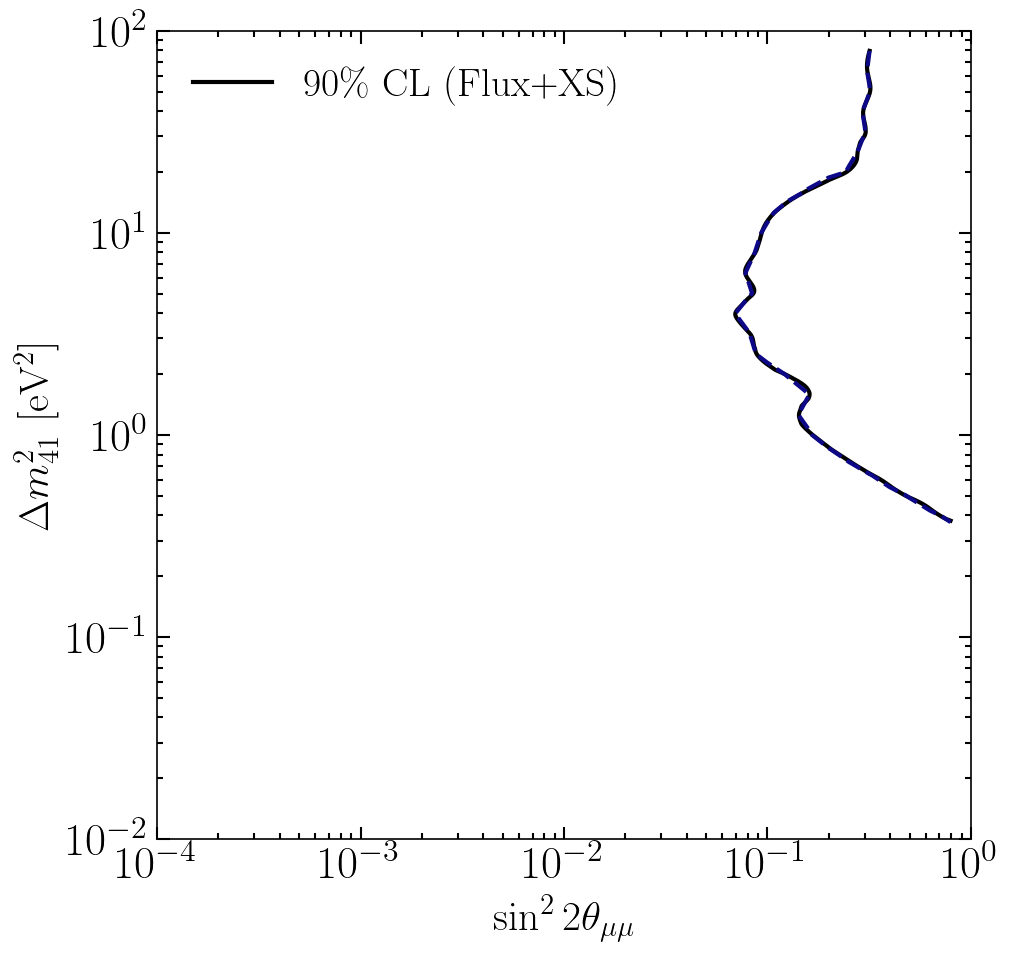

In [41]:

#Load text file containing m4, um4, ue4, and chisq values
nueapp_vals = np.genfromtxt('test_full_grid.txt')

############### sensitivity curve for nue appearance ############################
## Pass the function 1) ue4(or um4) 2) m4 3) chisq and 4) critical chisq value. here it's 6.63 i.e 99%CL 
nue_99CL = getContour((nueapp_vals[:,0]),nueapp_vals[:,1],nueapp_vals[:,2], 1.6, 0) 


f=plt.figure(figsize=(7,7), dpi=150)
ax=plt.subplot(111)
plt.loglog()
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=20)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)

plt.plot(10**(nue_99CL[:,0]) ,10**(nue_99CL[:,1]) ,linewidth=2, linestyle="-",label="$90\\%$ CL (Flux+XS)", color='k')
cs = plt.contour(np.power(10,xg),np.power(10,yg),zg, nlevels, linewidths=[2], linestyles=['dashed'])

proxy = [mlines.Line2D([], [], color=pc,linewidth=3) 
    for pc in ['k']]

leg=plt.legend(fontsize=19, loc='upper left')
leg.get_frame().set_linewidth(0.0)
plt.ylim(1e-2, 100)
plt.xlim(1e-4, 1)
plt.show()

MIN:  4.05966e-08


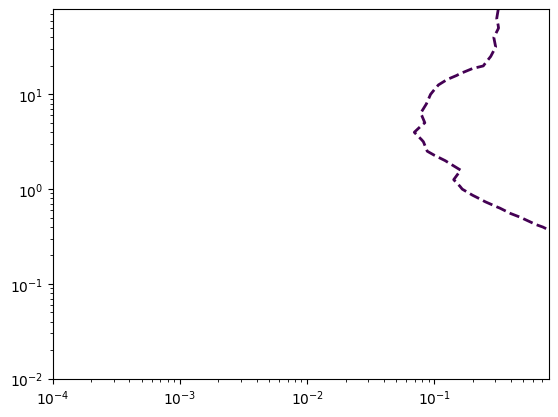

In [38]:
#The pivot way of plotting contours. more stable at coarser binning.

from scipy.interpolate import RegularGridInterpolator
import seaborn as sns

mcol = sns.color_palette('colorblind')
# Extract x, y, and z values from the DataFrame
nueapp_vals = np.genfromtxt('test_full_grid.txt')
df = pd.DataFrame(nueapp_vals, columns=['m4', 'mumu', 'chi'])
x = nueapp_vals[:,0]
y = nueapp_vals[:,1]
z = nueapp_vals[:,2]

xi = np.linspace(min(x), max(x), np.unique(x).size)
yi = np.linspace(min(y), max(y), np.unique(y).size)

#PIVOTS! thats the way
minchi=np.min(z)
print("MIN: ", minchi) 
sig=df.pivot(index='m4', columns='mumu', values='chi').to_numpy()

# Create a RegularGridInterpolator "linear", "nearest", "slinear", "cubic", "quintic" and "pchip".
interp_func = RegularGridInterpolator((xi, yi), sig-minchi, method='pchip')
# Create a grid of xi and yi values using the minimum and maximum values of x and y
N = 40  # Number of points in xg and yg
xg = np.linspace(min(xi), max(xi), num=N)
yg = np.linspace(min(yi), max(yi), num=N)
# Create a meshgrid from xg and yg
xg_mesh, yg_mesh = np.meshgrid(xg, yg)
# Interpolate the z values onto the meshgrid using RegularGridInterpolator
zg = interp_func((xg_mesh, yg_mesh))
nlevels = [1.6]
cs = plt.contour(np.power(10,xg),np.power(10,yg),zg, nlevels, linewidths=[2], linestyles=['dashed'])
plt.loglog()
plt.show()

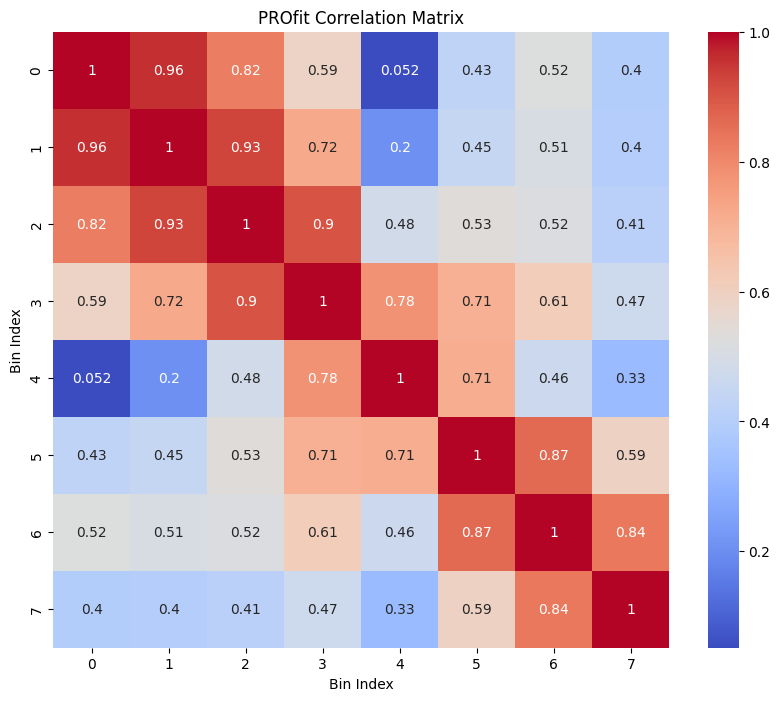

In [1]:
#Very simple covariance matrix plotter.. 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

matrix = [
    [1, 0.95877, 0.8238, 0.588394, 0.0516073, 0.427461, 0.522276, 0.395765],
    [0.95877, 1, 0.928188, 0.72256, 0.203533, 0.446447, 0.506093, 0.399346],
    [0.8238, 0.928188, 1, 0.900311, 0.483804, 0.534079, 0.517122, 0.413825],
    [0.588394, 0.72256, 0.900311, 1, 0.778731, 0.705687, 0.613339, 0.473933],
    [0.0516073, 0.203533, 0.483804, 0.778731, 1, 0.711903, 0.463472, 0.325065],
    [0.427461, 0.446447, 0.534079, 0.705687, 0.711903, 1, 0.865589, 0.588986],
    [0.522276, 0.506093, 0.517122, 0.613339, 0.463472, 0.865589, 1, 0.835656],
    [0.395765, 0.399346, 0.413825, 0.473933, 0.325065, 0.588986, 0.835656, 1]
]

matrix_np = np.array(matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_np, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title('PROfit Correlation Matrix')
plt.xlabel('Bin Index')
plt.ylabel('Bin Index')
plt.show()
